<a href="https://colab.research.google.com/github/asiyabanu9/231801015-Principles-of-Data-Science-Experiments/blob/main/Principles%20of%20Data%20Science%20Exp%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [5]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

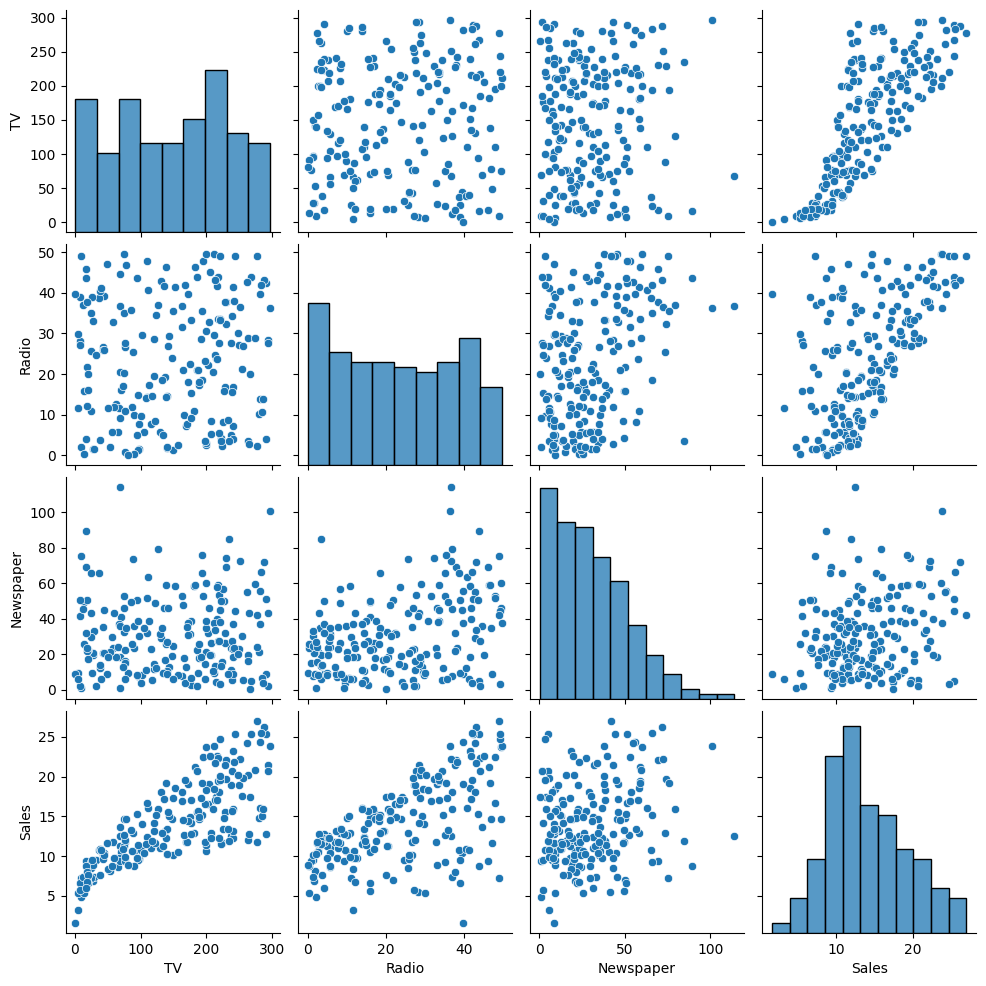

In [6]:
 import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['TV', 'Radio', 'Newspaper', 'Sales']])
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

In [10]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled)

y_pred_svr = scaler_y.inverse_transform(svr.predict(X_test_scaled).reshape(-1, 1))

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def get_scores(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse
lr_scores = get_scores(y_test, y_pred_lr)
poly_scores = get_scores(y_test, y_pred_poly)
svr_scores = get_scores(y_test, y_pred_svr)

print("Linear:", lr_scores)
print("Polynomial:", poly_scores)
print("SVR:", svr_scores)

Linear: (1.4607567168117603, 3.1740973539761033, np.float64(1.78159966153345))
Polynomial: (0.5261794444043838, 0.41291022853790765, np.float64(0.6425809120553673))
SVR: (0.782523143348407, 1.1577408665300168, np.float64(1.0759836739142545))


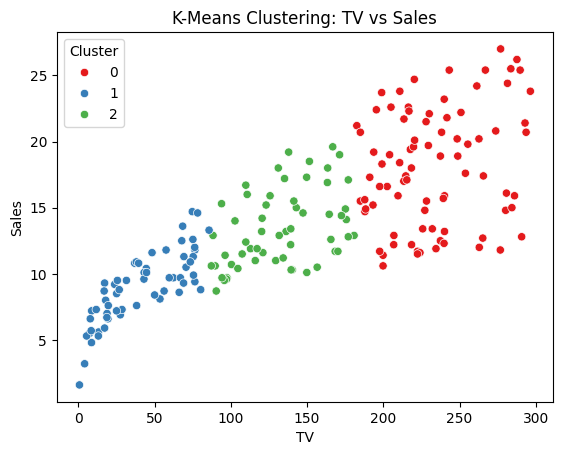

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

sns.scatterplot(data=df, x='TV', y='Sales', hue='Cluster', palette='Set1')
plt.title("K-Means Clustering: TV vs Sales")
plt.show()